In [1]:
from analysis import *
%matplotlib inline
pd.set_option('display.max_rows', 100)

In [114]:
axis = 'Y'
board_name = "wink"
data_calog = [ read_sdi_data('./SDI/random_'+board_name+'.csv', axis=axis) for axis in ['X', 'Y', 'Z'] ]
data_input = read_input_data('./signal_time_corrected.csv')

f_calogX, psd_calogX = psd(data_calog[0], sampling_rate=4000)
f_calogY, psd_calogY = psd(data_calog[1], sampling_rate=4000)
f_calogZ, psd_calogZ = psd(data_calog[2], sampling_rate=4000)

f_input, psd_input = psd(data_input,sampling_rate=4000)
f_table, psd_table = required_psd()


while len(psd_input) < len(psd_calogX): psd_input = np.insert(psd_input, 0, 0) 
resdf = pd.DataFrame({'f(Hz)':f_calogX, 'input(g^2/Hz)':psd_input, 'accelX(g^2/Hz)':psd_calogX, 'accelY(g^2/Hz)':psd_calogY, 'accelZ(g^2/Hz)':psd_calogZ})
resdf.loc[resdf['f(Hz)']>20].to_csv('analysis/psd_val_random_'+board_name+'.csv', index=False)

<Figure size 7200x1440 with 0 Axes>

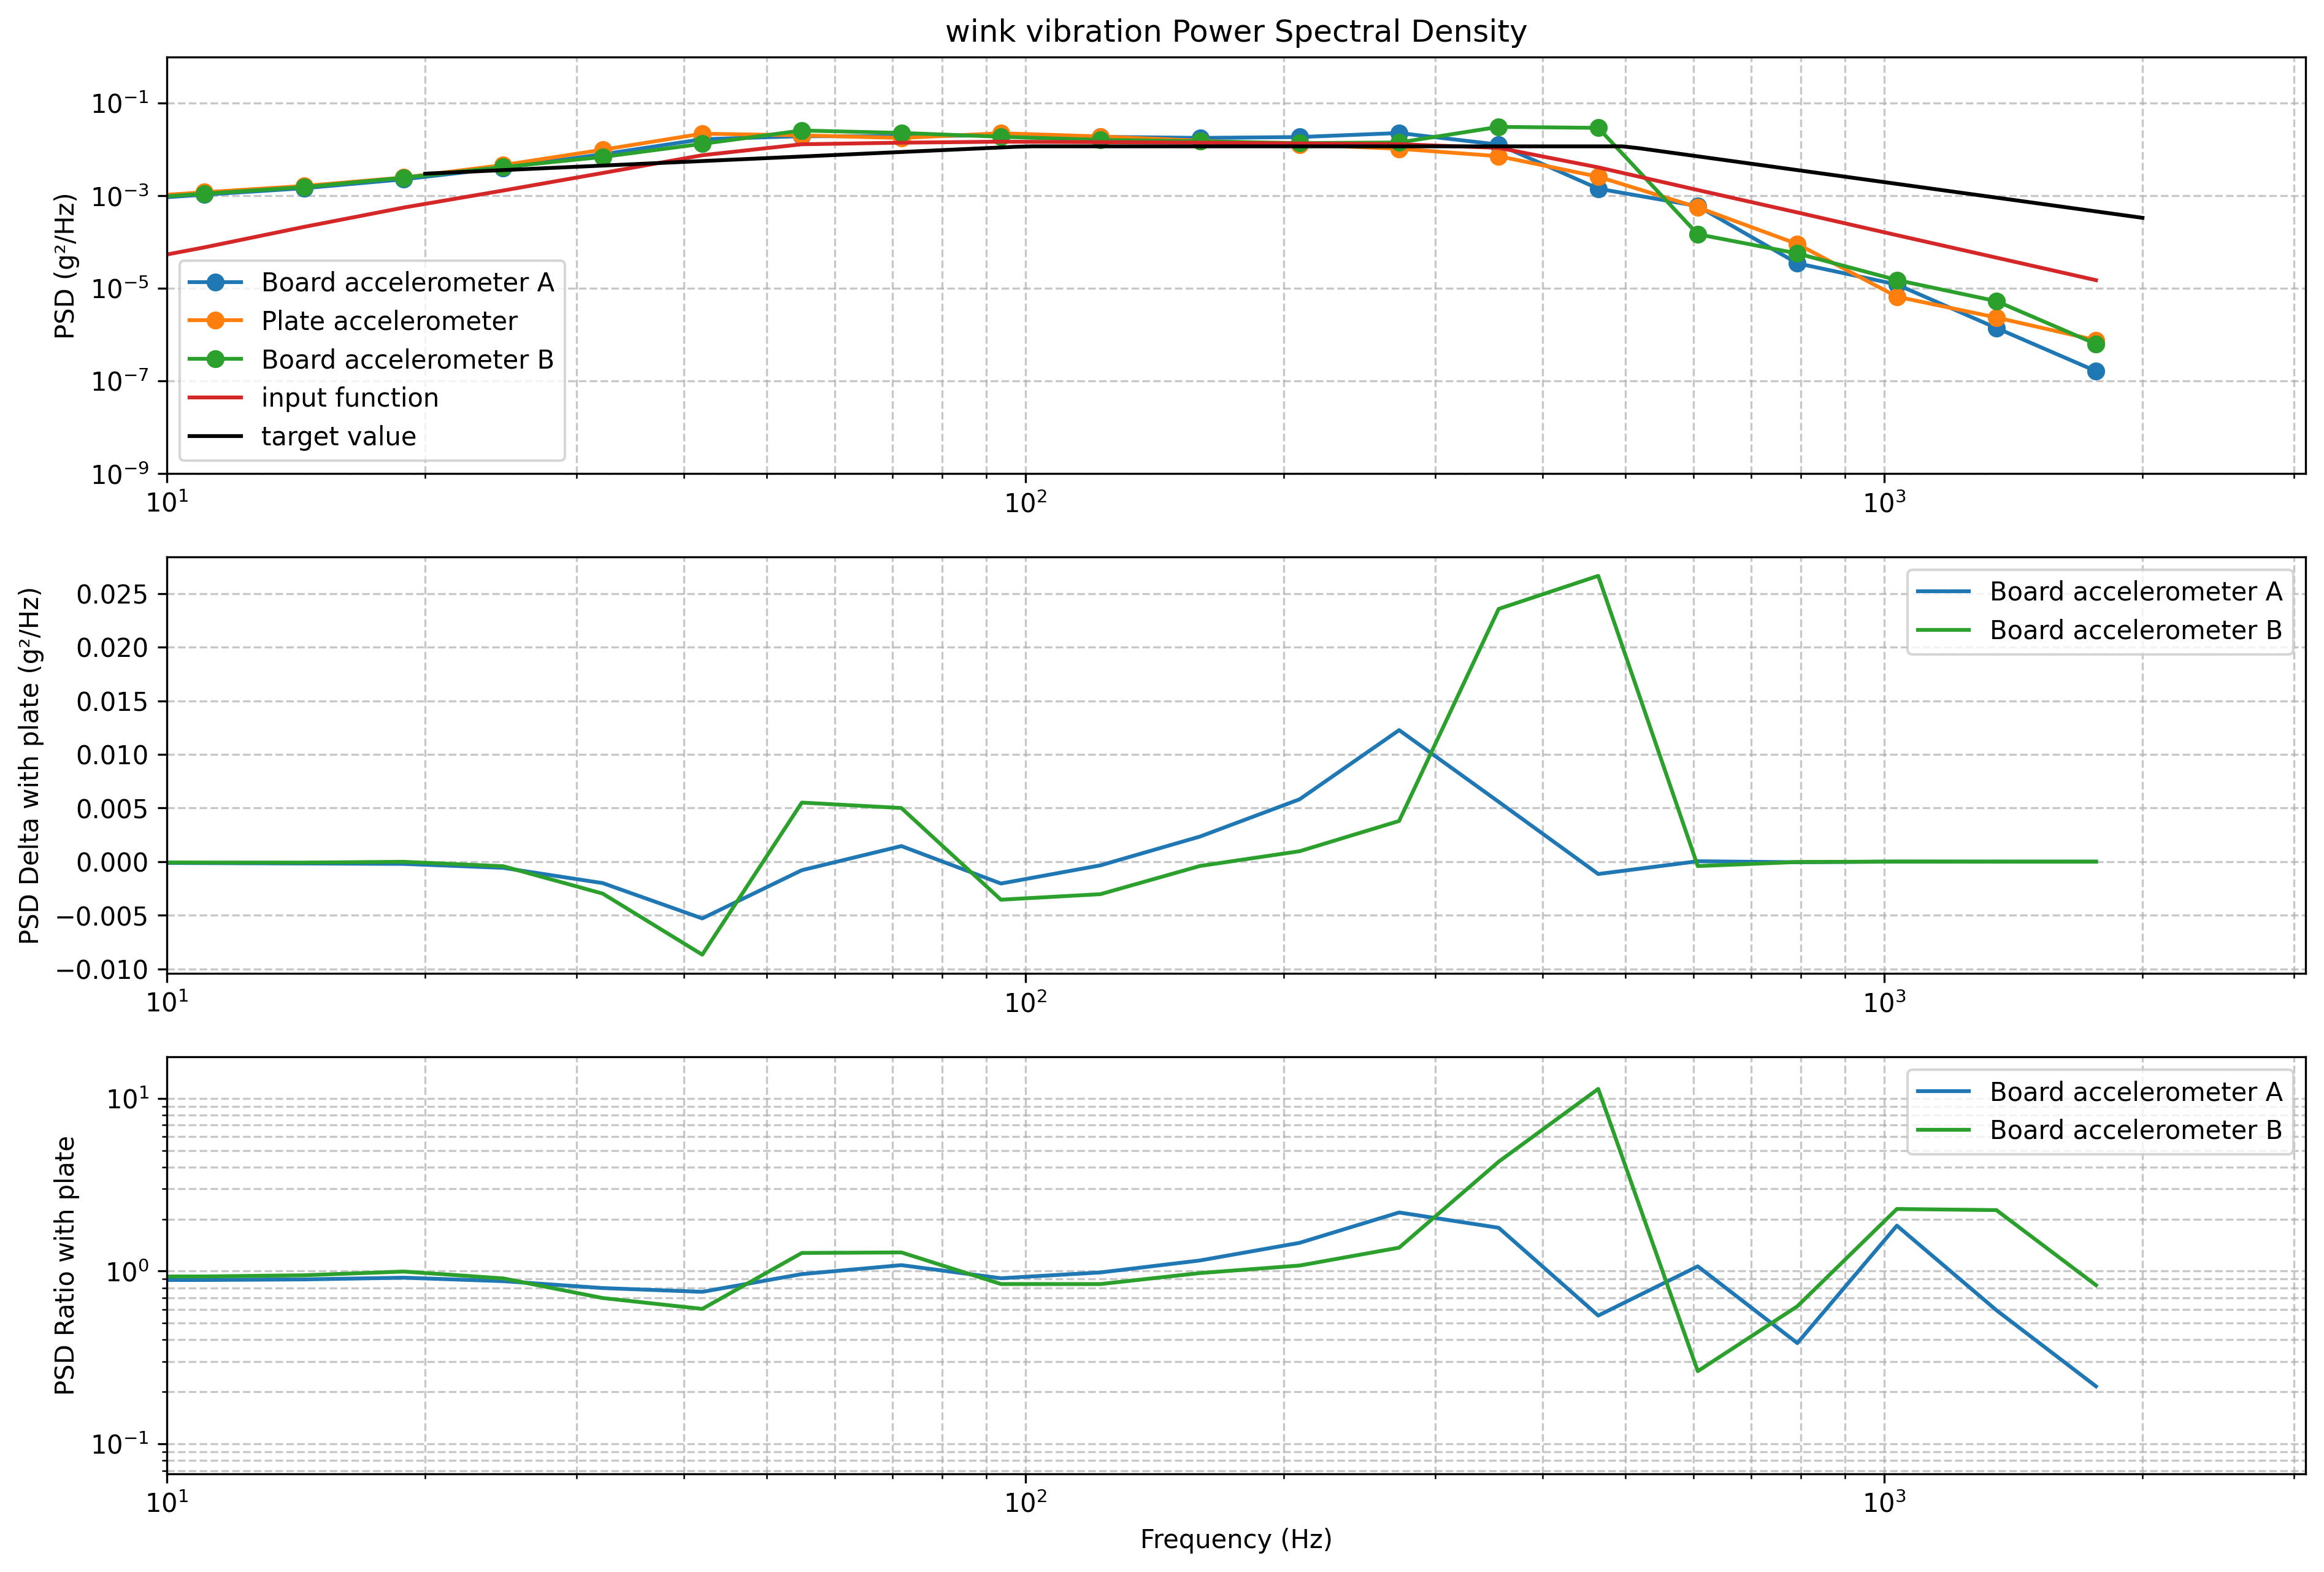

In [115]:
# Plot the binned Power Spectral Density (PSD)
plt.figure(figsize=(60, 12), dpi=120)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 10), dpi=300)


accelX = "Board accelerometer A"
accelY = "Plate accelerometer"
accelZ = "Board accelerometer B"


ax1.plot(f_calogX, psd_calogX, marker='o', label=accelX)
ax1.plot(f_calogY, psd_calogY, marker='o', label=accelY)
ax1.plot(f_calogZ, psd_calogZ, marker='o', label=accelZ)
ax1.plot(f_calogX, psd_input, label='input function')
ax1.plot(f_table, psd_table, '-', color='black', label='target value')


ax1.set_xscale('log')
ax1.set_yscale('log')
ax3.set_yscale('log')
ax2.set_xscale('log')
ax1.set_xlim(10,3100)
ax2.set_xlim(10,3100)
ax3.set_xscale('log')
ax3.set_xlim(10,3100)

#ax2.set_yscale('lin')
#plt.yscale('log')
ax1.set_ylim(10**(-9),1)
#ax2.set_ylim(-0.015, 0.015)
plt.xlabel('Frequency (Hz)')
ax1.set_ylabel('PSD (g²/Hz)')
ax2.set_ylabel('PSD Delta with plate (g²/Hz)')
ax3.set_ylabel('PSD Ratio with plate')
ax1.set_title(board_name+' vibration Power Spectral Density')
ax1.grid(True, which='both', linestyle='--', alpha=0.7)
ax2.grid(True, which='both', linestyle='--', alpha=0.7)
ax3.grid(True, which='both', linestyle='--', alpha=0.7)

ax2.plot(f_calogX, psd_calogX-psd_calogY, label=accelX )
ax2.plot(f_calogX, psd_calogZ-psd_calogY, color="#2ca02c", label=accelZ )

ax3.plot(f_calogX, psd_calogX/psd_calogY, label=accelX )
ax3.plot(f_calogX, psd_calogZ/psd_calogY, color="#2ca02c", label=accelZ )
ax1.legend()
ax2.legend()
ax3.legend()
plt.savefig('analysis/plot_'+board_name+'.png')
plt.show()